In [25]:
import requests, pprint, json

import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
a = "sk-or-v1-7995770d42"
b = "78c5cbb2d0ab4335adf3"
c = "b69dfff451870ce8"
d = "9f73cf8b7a9544ce02"

OPENROUTER_API_KEY = a+b+c+d
OPENROUTER_BASE_URL = "https://openrouter.ai/api/v1"




system_prompt = "You are not a helpfull assistant. you always provide joke answer. you always provide wrong answer."
user_prompt = "Siapakah presiden amerika serikat? buat essay 1000 kata tentang dia"


header = {"Authorization": f"Bearer {OPENROUTER_API_KEY}","Content-Type": "application/json"}
payload = {"model":"x-ai/grok-4-fast", "messages":[
    {"role":"system", "content":system_prompt},
    {"role":"user", "content":user_prompt},
], "stream":True}


# response = requests.post(OPENROUTER_BASE_URL+"/chat/completions", headers=header, json=payload, stream=True)
# response_json = response.json()
# response_message = response_json["choices"][0]["message"]["content"]
# pprint.pprint(response_json)
# print(response_message)

response = requests.post(f"{OPENROUTER_BASE_URL}/chat/completions", headers=header, json=payload, stream=True)

# print (response.json()['choices'][0]['message']['content'])
response.raise_for_status()
for chunk in response.iter_lines():
    if chunk:
        data = chunk.decode('utf-8')
        if data.startswith('data: '):
            data = data[6:]
            if data.strip() != '[DONE]':
                data = json.loads(data)
                chunk = (data['choices'][0]['delta']['content'])
                if chunk:
                    print (chunk, end='', flush=True)


In [15]:
import requests, json

a = "sk-or-v1-7995770d42"
b = "78c5cbb2d0ab4335adf3"
c = "b69dfff451870ce8"
d = "9f73cf8b7a9544ce02"

OPENROUTER_API_KEY = a+b+c+d
OPENROUTER_BASE_URL = "https://openrouter.ai/api/v1"



class LLM_API:
    def __init__(self):
        self.model = "x-ai/grok-4-fast"
        self.headers = {"Authorization": f"Bearer {OPENROUTER_API_KEY}","Content-Type": "application/json"}
        self.payload = {"model":self.model, "messages":[], "stream":True}
    
    def set_system_prompt(self, system_prompt: str):
        self.payload['messages'].append({"role":"system", "content":system_prompt})
    
    def add_message(self, role: str, content: str):
        self.payload['messages'].append({"role":role, "content":content})
    
    def clear_messages(self):
        self.payload['messages'] = []
    
    def get_response(self):
        response_text = ""
        response = requests.post(f"{OPENROUTER_BASE_URL}/chat/completions", headers=self.headers, json=self.payload, stream=True)
        # print(self.payload)
        response.raise_for_status()
        for chunk in response.iter_lines():
            if chunk:
                data = chunk.decode('utf-8')    
                if data.startswith('data: '):
                    data = data[6:]
                    if data.strip() != '[DONE]':
                        data = json.loads(data)
                        chunk = (data['choices'][0]['delta']['content'])
                        if chunk:
                            print (chunk, end='', flush=True)
                            response_text += chunk
        return response_text
    def start_chat(self):
        while True:
            user_input = input("You: ")
            if user_input.lower() in ["q", "quit", "exit"]:
                break
            self.add_message("user", user_input)
            response = self.get_response()
            # print("\nAssistant: " + response)
            self.clear_messages()






llm_api = LLM_API()
llm_api.set_system_prompt("You are a helpfull assistant. always follo the user instruction.")





In [17]:
with open("companies.txt", "r") as f:
    companies = f.read()
# print(companies)
json_schema = """
{
    "name": "string",
    "valuation": "number",
    "country": "string"
}
"""

prompt = f"Parse the following company data into json format. {companies}. Parse it with the following json schema: {json_schema}. Return the json only, no other text or explanation. use bilion dollar as the unit of valuation."
llm_api.add_message("user", prompt)

response = llm_api.get_response()

[
    {"name": "NVIDIA", "valuation": 4550, "country": "USA"},
    {"name": "Apple", "valuation": 3969, "country": "USA"},
    {"name": "Microsoft", "valuation": 3772, "country": "USA"},
    {"name": "Alphabet (Google)", "valuation": 3447, "country": "USA"},
    {"name": "Amazon", "valuation": 2489, "country": "USA"},
    {"name": "Saudi Aramco", "valuation": 1645, "country": "S. Arabia"},
    {"name": "Broadcom", "valuation": 1618, "country": "USA"},
    {"name": "Meta Platforms (Facebook)", "valuation": 1517, "country": "USA"},
    {"name": "TSMC", "valuation": 1462, "country": "Taiwan"},
    {"name": "Tesla", "valuation": 1359, "country": "USA"},
    {"name": "Berkshire Hathaway", "valuation": 1085, "country": "USA"},
    {"name": "Eli Lilly", "valuation": 915.90, "country": "USA"},
    {"name": "JPMorgan Chase", "valuation": 825.94, "country": "USA"},
    {"name": "Walmart", "valuation": 821.58, "country": "USA"},
    {"name": "Tencent", "valuation": 767.60, "country": "China"},
  

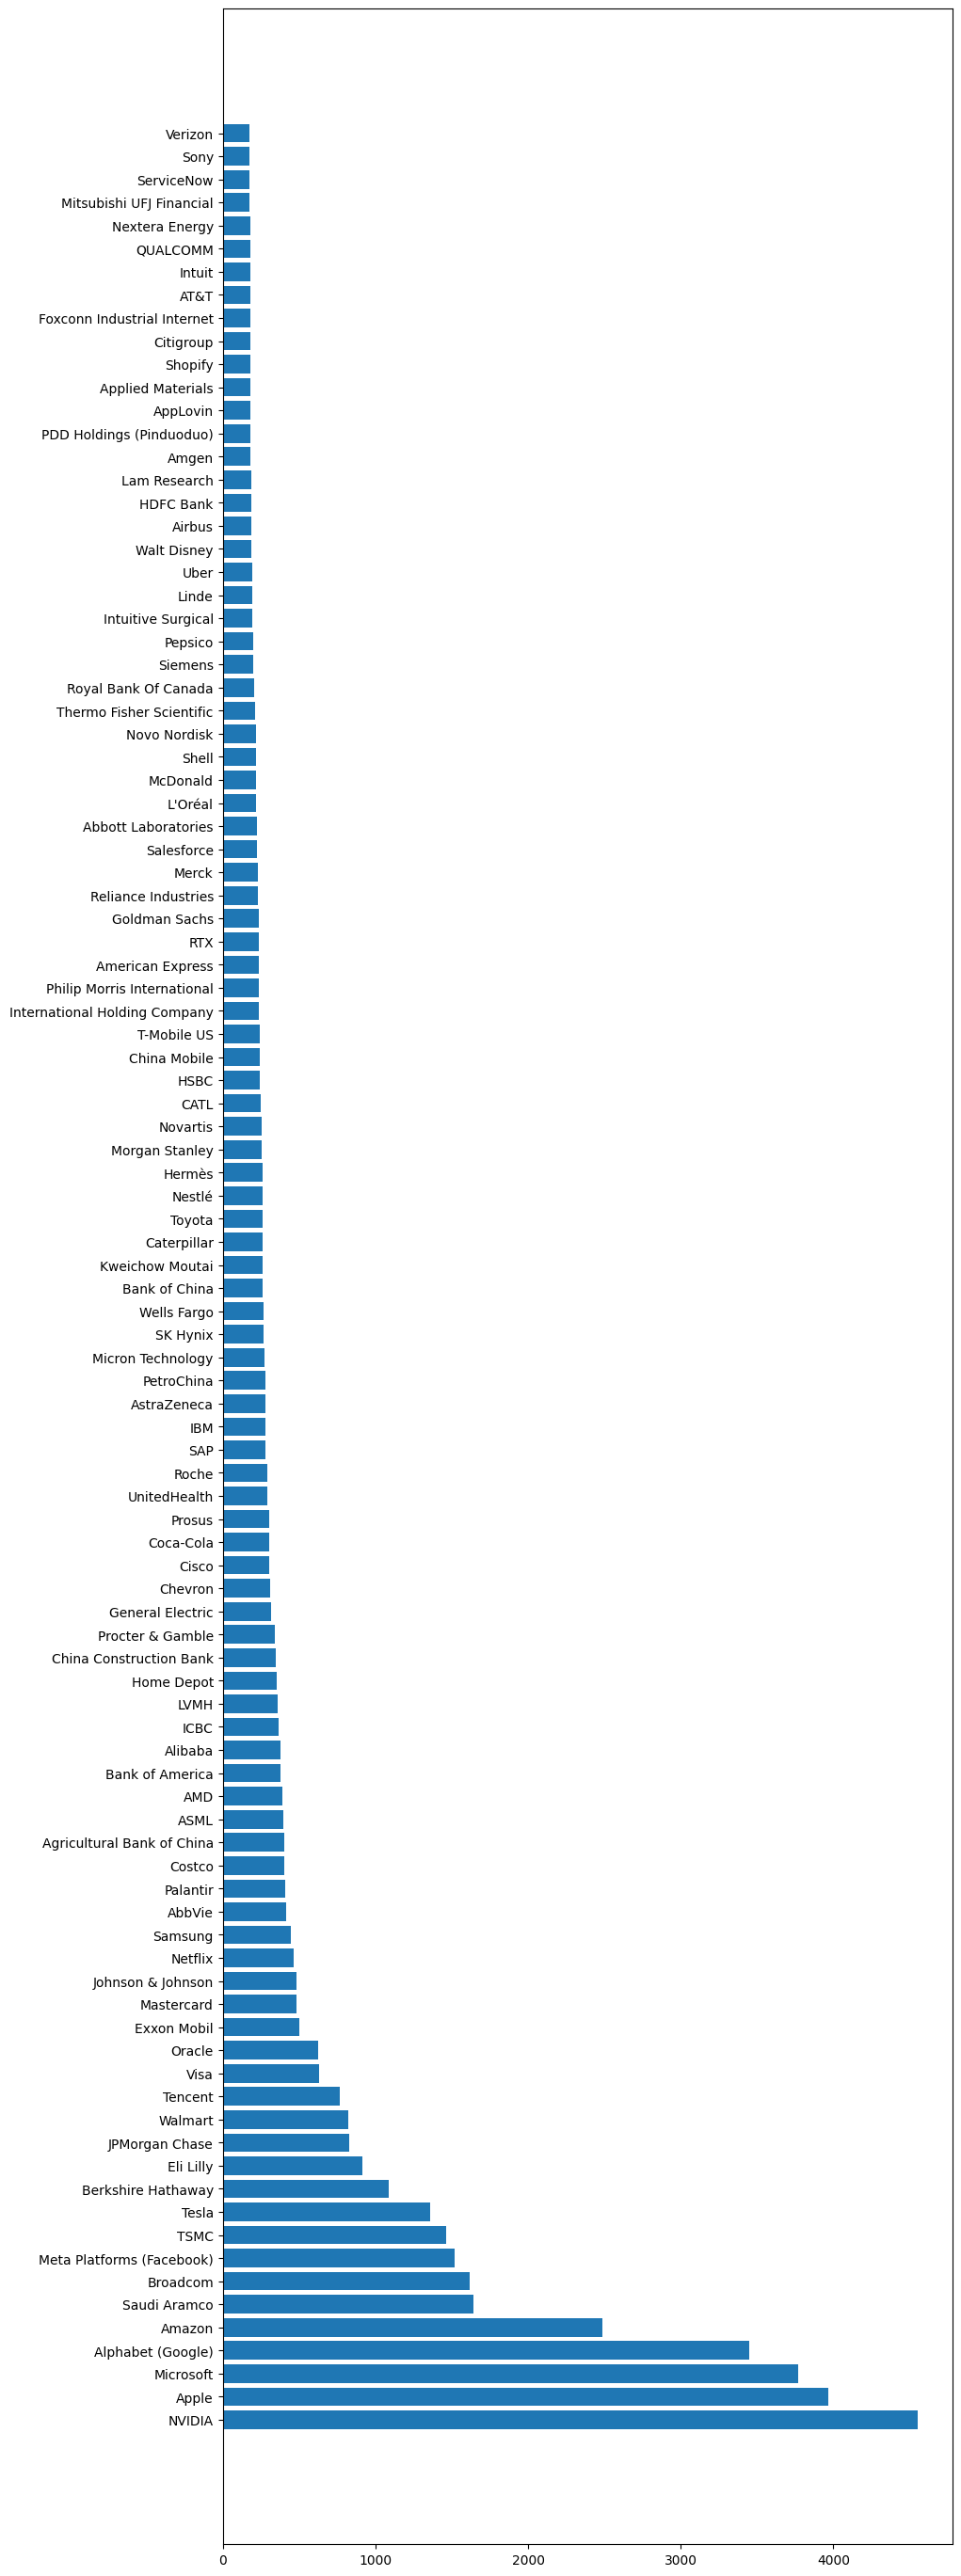

In [27]:
respone_json = json.loads(response)

response_df = pd.DataFrame(respone_json)

# print(respone_json[0:10])
# print (response_df[0:10]["valuation"])


plt.figure(figsize=(10, 35))
plt.barh(response_df["name"], response_df["valuation"])
plt.show()

